Processing files and read dataset

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np
import ast

#read tfidf files
train_df_tfidf = pd.read_csv('train_tfidf.csv')
dev_df_tfidf = pd.read_csv('dev_tfidf.csv')
#split into label and tweet set
train_tweet_tfidf = train_df_tfidf['tweet']
dev_tweet_tfidf = dev_df_tfidf['tweet']
train_labels = train_df_tfidf['region']
train_labels=train_labels.tolist()
dev_labels = dev_df_tfidf['region']
dev_labels=dev_labels.tolist()
#convert to 2D array
train_tweet_tfidf=[ast.literal_eval(row) for row in train_tweet_tfidf.tolist()]
dev_tweet_tfidf=[ast.literal_eval(row) for row in dev_tweet_tfidf.tolist()]

#get number of words 
words=open("vocab.txt","r").readlines()
no_words=len(words) #2038 words

#process train feature set 
train_features=[]
for x in train_tweet_tfidf:
    each_instance = [0] * no_words #initialize 1D-array of 0 for all words   
    #for each tuple    
    for t in x:        
        each_instance[t[0]]=t[1] #assign value to the list with the index
    #append the feature
    train_features.append(each_instance)
    
#process dev feature set
dev_features=[]
for x in dev_tweet_tfidf:
    each_instance = [0] * no_words #initialize 1D-array of 0 for all words   
    #for each tuple    
    for t in x:        
        each_instance[t[0]]=t[1] #assign value to the list with the index
    #append the feature
    dev_features.append(each_instance)

print(">>>>>>>>Read data successully!")

>>>>>>>>Read data successully!


Training classifiers:<br>

In [ ]:
# 0R baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(np.array(train_features),np.array(train_labels))
y_pred=dummy_clf.predict(dev_features)
y_true=np.array(dev_labels)
print("-------------------- 0R baseline --------------------")
print("majority class：",y_pred[0])
print("Accuracy on dev set:",round(accuracy_score(y_true, y_pred),3)," | ","F1-Score:",round(f1_score(y_true, y_pred, average='macro'),3))


-------------------- 0R baseline --------------------
majority class： NORTHEAST
Accuracy on dev set: 0.374  |  F1-Score: 0.136


Training multinominal naive bayes

In [ ]:
# MultinomialNB
print("---------- MultinominalNB ----------")
params = np.arange(0.1,1,0.1) #create params array
dev_score=[]
train_score=[]
for p in params:
  clf = MultinomialNB(alpha=p)
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  dev_score.append(clf.score(dev_features,dev_labels))
  train_score.append(clf.score(train_features,train_labels))
  print(f"********** alphpoa={round(p,1)} *************")
  print("Accuracy:",round(accuracy_score(y_true, y_pred),3)," | ","F1-Score:",round(f1_score(y_true, y_pred, average='macro'),3))

result = np.where(max(dev_score))
max_index = result[0]
print(f"The highest accuracy on dev set is {max(dev_score)} with alpha={params[max_index]}")

---------- MultinominalNB ----------
********** alphpoa=0.1 *************
Accuracy: 0.463  |  F1-Score: 0.27
********** alphpoa=0.2 *************
Accuracy: 0.463  |  F1-Score: 0.27
********** alphpoa=0.3 *************
Accuracy: 0.463  |  F1-Score: 0.269
********** alphpoa=0.4 *************
Accuracy: 0.463  |  F1-Score: 0.269
********** alphpoa=0.5 *************
Accuracy: 0.464  |  F1-Score: 0.269
********** alphpoa=0.6 *************
Accuracy: 0.464  |  F1-Score: 0.269
********** alphpoa=0.7 *************
Accuracy: 0.464  |  F1-Score: 0.269
********** alphpoa=0.8 *************
Accuracy: 0.464  |  F1-Score: 0.269
********** alphpoa=0.9 *************
Accuracy: 0.464  |  F1-Score: 0.269
The highest accuracy on dev set is 0.4636165577342048 with alpha=[0.1]


Plot multinominal naive bayes accuracy

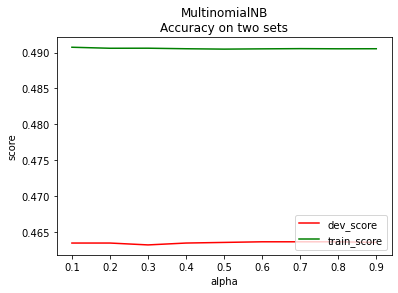

In [ ]:
plt.title("MultinomialNB\nAccuracy on two sets")
plt.xlabel("alpha")
plt.ylabel("score")
plt.plot(params,dev_score,color='r')
plt.plot(params,train_score,color='g')
plt.legend(['dev_score','train_score'],loc='lower right')
plt.show()

Tuning MLP:

In [ ]:
# Multi-Layer Perceptron
print("------------------------- MLP ---------------------------")
params = np.arange(20,75,10) #create params array
relu_score=[]
log_score=[]
relu_adapt_score=[]
log_adapt_score=[]
relu_f1=[]
log_f1=[]
relu_adapt_f1=[]
log_adapt_f1=[]
#activation='logistic',learning_rate='constant'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='logistic')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  log_score.append(round(accuracy_score(y_true, y_pred),3))
  log_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))
  
#activation='logistic', learning_rate='adaptive'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='logistic',learning_rate='adaptive')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  log_adapt_score.append(round(accuracy_score(y_true, y_pred),3))
  log_adapt_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

#activation='relu', learning_rate='constant'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='relu')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  relu_score.append(round(accuracy_score(y_true, y_pred),3))
  relu_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

#activation='relu', learning_rate='adaptive'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='relu',learning_rate='adaptive')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  relu_adapt_score.append(round(accuracy_score(y_true, y_pred),3))
  relu_adapt_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

print("\nTrained successfully!")

--------------- MLP ---------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Trained successfully!


output results of tuning parameters

In [ ]:
#output results:
print('max_iter =   20  |   30 |   40 |   50 |  60 |  70')
print("***activation='logistic',learning_rate='constant'****")
print("Accuracy =",log_score)
print("F1 score =",log_f1)
print("***activation='logistic',learning_rate='adaptive'***")
print("Accuracy =",log_adapt_score)
print("F1 score =",log_adapt_f1)
print("***activation='relu',learning_rate='constant'***")
print("Accuracy =",relu_score)
print("F1 score =",relu_f1)
print("***activation='relu',learning_rate='adaptive'***")
print("Accuracy =",relu_adapt_score)
print("F1 score =",relu_adapt_f1)

max_iter =   20  |   30 |   40 |   50 |  60 |  70
***activation='logistic',learning_rate='constant'****
Accuracy = [0.457, 0.457, 0.454, 0.455, 0.46, 0.456]
F1 score = [0.28, 0.283, 0.281, 0.281, 0.281, 0.278]
***activation='logistic',learning_rate='adaptive'***
Accuracy = [0.45, 0.459, 0.456, 0.459, 0.453, 0.457]
F1 score = [0.279, 0.278, 0.28, 0.28, 0.284, 0.288]
***activation='relu',learning_rate='constant'***
Accuracy = [0.41, 0.398, 0.389, 0.385, 0.383, 0.383]
F1 score = [0.293, 0.297, 0.292, 0.287, 0.295, 0.293]
***activation='relu',learning_rate='adaptive'***
Accuracy = [0.408, 0.396, 0.39, 0.381, 0.381, 0.378]
F1 score = [0.295, 0.292, 0.293, 0.288, 0.29, 0.287]


plotting accuracy and f1 score:

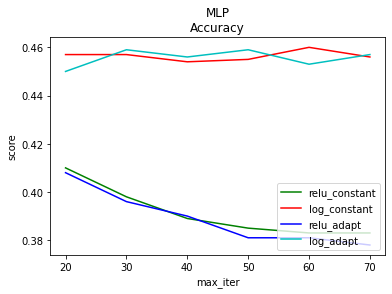

In [ ]:
#plotting the accuracy
plt.title("MLP\nAccuracy")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(params,relu_score,color='g')
plt.plot(params,log_score,color='r')
plt.plot(params,relu_adapt_score,color='b')
plt.plot(params,log_adapt_score,color='c')
plt.legend(['relu_constant','log_constant','relu_adapt','log_adapt'],loc='lower right')
plt.show()

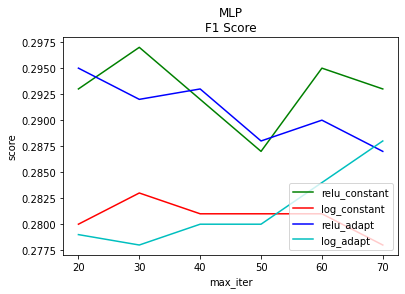

In [ ]:
#plotting f1 score
plt.title("MLP\nF1 Score")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(params,relu_f1,color='g')
plt.plot(params,log_f1,color='r')
plt.plot(params,relu_adapt_f1,color='b')
plt.plot(params,log_adapt_f1,color='c')
plt.legend(['relu_constant','log_constant','relu_adapt','log_adapt'],loc='lower right')
plt.show()



---



Find MLP in range (1,30)

In [ ]:
params = np.arange(1,30,2) #create params array
relu_score=[]
log_score=[]
relu_adapt_score=[]
log_adapt_score=[]
relu_f1=[]
log_f1=[]
relu_adapt_f1=[]
log_adapt_f1=[]
#activation='logistic',learning_rate='constant'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='logistic')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  log_score.append(round(accuracy_score(y_true, y_pred),3))
  log_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))
  
#activation='logistic', learning_rate='adaptive'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='logistic',learning_rate='adaptive')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  log_adapt_score.append(round(accuracy_score(y_true, y_pred),3))
  log_adapt_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

#activation='relu', learning_rate='constant'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='relu')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  relu_score.append(round(accuracy_score(y_true, y_pred),3))
  relu_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

#activation='relu', learning_rate='adaptive'
for p in params:
  clf = MLPClassifier(max_iter=p, activation='relu',learning_rate='adaptive')
  clf.fit(train_features,train_labels)
  y_pred = clf.predict(dev_features)
  y_true=dev_labels
  #append scores
  relu_adapt_score.append(round(accuracy_score(y_true, y_pred),3))
  relu_adapt_f1.append(round(f1_score(y_true, y_pred, average='macro'),3))

print("\nTrained successfully!")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc


Trained successfully!


In [ ]:
#output results:
print('max_iter in (1,30)')
print("**************activation='logistic',learning_rate='constant'**************")
print("Accuracy =",log_score)
print("F1 score =",log_f1)
print("**************activation='logistic',learning_rate='adaptive'**************")
print("Accuracy =",log_adapt_score)
print("F1 score =",log_adapt_f1)
print("************** activation='relu',  learning_rate='constant' **************")
print("Accuracy =",relu_score)
print("F1 score =",relu_f1)
print("************** activation='relu',  learning_rate='adaptive' *************")
print("Accuracy =",relu_adapt_score)
print("F1 score =",relu_adapt_f1)

max_iter in (1,30)
**************activation='logistic',learning_rate='constant'**************
Accuracy = [0.447, 0.462, 0.461, 0.453, 0.46, 0.458, 0.456, 0.456, 0.457, 0.459, 0.453, 0.459, 0.458, 0.454, 0.459]
F1 score = [0.25, 0.269, 0.271, 0.27, 0.28, 0.28, 0.286, 0.282, 0.278, 0.281, 0.274, 0.281, 0.282, 0.274, 0.284]
**************activation='logistic',learning_rate='adaptive'**************
Accuracy = [0.45, 0.465, 0.461, 0.46, 0.46, 0.457, 0.457, 0.459, 0.459, 0.457, 0.456, 0.458, 0.459, 0.459, 0.452]
F1 score = [0.254, 0.268, 0.275, 0.278, 0.277, 0.278, 0.279, 0.281, 0.278, 0.278, 0.277, 0.283, 0.279, 0.283, 0.281]
************** activation='relu',  learning_rate='constant' **************
Accuracy = [0.461, 0.457, 0.453, 0.45, 0.44, 0.428, 0.423, 0.413, 0.419, 0.415, 0.411, 0.413, 0.4, 0.404, 0.404]
F1 score = [0.27, 0.275, 0.278, 0.282, 0.281, 0.283, 0.288, 0.292, 0.291, 0.295, 0.287, 0.297, 0.295, 0.294, 0.296]
************** activation='relu',  learning_rate='adaptive' *******

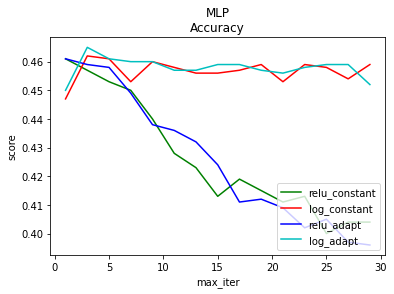

In [ ]:
#plotting the accuracy
plt.title("MLP\nAccuracy")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(params,relu_score,color='g')
plt.plot(params,log_score,color='r')
plt.plot(params,relu_adapt_score,color='b')
plt.plot(params,log_adapt_score,color='c')
plt.legend(['relu_constant','log_constant','relu_adapt','log_adapt'],loc='lower right')
plt.show()

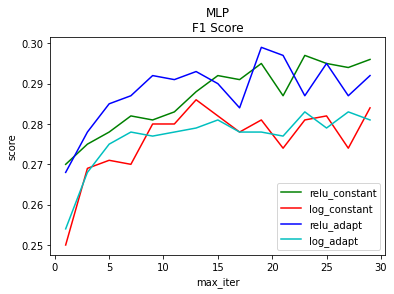

In [ ]:
#plotting f1 score
plt.title("MLP\nF1 Score")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(params,relu_f1,color='g')
plt.plot(params,log_f1,color='r')
plt.plot(params,relu_adapt_f1,color='b')
plt.plot(params,log_adapt_f1,color='c')
plt.legend(['relu_constant','log_constant','relu_adapt','log_adapt'],loc='lower right')
plt.show()